In [2]:
pip install jupytertext


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement jupytertext
ERROR: No matching distribution found for jupytertext


In [28]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [29]:
sec=pdr.get_data_yahoo('005930.KS',start='2019-04-11')
msft=pdr.get_data_yahoo('MSFT',start='2019-04-11')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [30]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-11,46700.0,46800.0,46150.0,46250.0,43278.046875,13697399
2019-04-12,46050.0,46900.0,46000.0,46850.0,43839.496094,7668936
2019-04-15,47150.0,47500.0,47000.0,47050.0,44026.640625,8733019
2019-04-16,47400.0,47400.0,46800.0,47250.0,44213.796875,7730881
2019-04-17,47300.0,47600.0,47000.0,47050.0,44026.640625,5513658


In [31]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,119.760002,120.349998,119.540001,120.190002,117.427277,16477200
2019-04-11,120.540001,120.849998,119.919998,120.330002,117.564056,14209100
2019-04-12,120.639999,120.980003,120.370003,120.949997,118.169792,19745100
2019-04-15,120.940002,121.580002,120.570000,121.050003,118.267502,15792600
2019-04-16,121.639999,121.650002,120.099998,120.769997,117.993942,14071800


In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

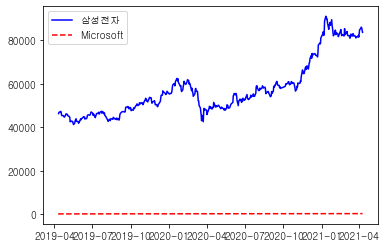

In [33]:
# plt.plot(range(50), data, 'r')
# plt.title('시간별 가격 추이', fontproperties=fontprop)
# plt.ylabel('주식 가격', fontproperties=fontprop)
# plt.xlabel('시간(분)', fontproperties=fontprop)
# plt.show()

plt.plot(sec.index, sec.Close, 'b', label='삼성전자')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')

In [42]:
# shift?
type(sec['Close'])
sec['Close'].shift(1).head()  #데이터를 1만큼 lag

Date
2019-04-11        NaN
2019-04-12    46250.0
2019-04-15    46850.0
2019-04-16    47050.0
2019-04-17    47250.0
Name: Close, dtype: float64


In [35]:
#shift활용하여 수익률로 표현
sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc.head()

Date
2019-04-11         NaN
2019-04-12    1.297297
2019-04-15    0.426894
2019-04-16    0.425080
2019-04-17   -0.423280
Name: Close, dtype: float64

In [36]:
sec_dpc.iloc[0]=0
sec_dpc.head()

Date
2019-04-11    0.000000
2019-04-12    1.297297
2019-04-15    0.426894
2019-04-16    0.425080
2019-04-17   -0.423280
Name: Close, dtype: float64

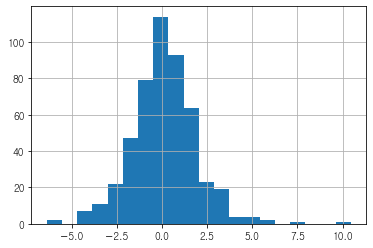

In [37]:
plt.hist(sec_dpc, bins=20)
plt.grid(True)

#삼성전자의 수익률 분포 정규분포 형태를 띤다

In [38]:
#일간 변동률의 누적합 ~ 관측시점기준으로 최종 수익률 산출
sec_dpc_cs=sec_dpc.cumsum()
sec_dpc_cs

Date
2019-04-11     0.000000
2019-04-12     1.297297
2019-04-15     1.724192
2019-04-16     2.149271
2019-04-17     1.725991
                ...    
2021-04-05    69.488910
2021-04-06    70.191486
2021-04-07    69.726369
2021-04-08    68.674968
2021-04-09    67.376266
Name: Close, Length: 493, dtype: float64

In [39]:
#Microsoft
msft_dpc = (msft['Close']/msft['Close'].shift(1)-1)*100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs.head()

Date
2019-04-10    0.000000
2019-04-11    0.116482
2019-04-12    0.631727
2019-04-15    0.714411
2019-04-16    0.483097
Name: Close, dtype: float64

In [40]:
msft_dpc_cs=msft_dpc.cumsum()
msft_dpc_cs

Date
2019-04-10     0.000000
2019-04-11     0.116482
2019-04-12     0.631727
2019-04-15     0.714411
2019-04-16     0.483097
                ...    
2021-04-05    84.731244
2021-04-06    84.245434
2021-04-07    85.068477
2021-04-08    86.409015
2021-04-09    87.435671
Name: Close, Length: 504, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

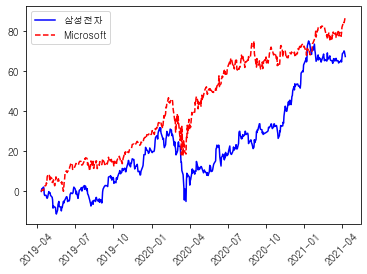

In [41]:
plt.plot(sec.index, sec_dpc_cs, 'b', label='삼성전자')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show

# 추세도 변동성도 같은방향으로움직이는 경향